# Python for Engineering Analysis

By

**Olagoke Oladokun**  
**Bemgba Bevan Nyakuma**  
**Arshad Ahmad**

---

# Chapter 3
# Mathematical Modelling and Simulation

In this chapter we will carryout some simple mathematical modelling and simulation in Biomass thermochemical conversion processes and Kinetic study. This will enable us use more language syntax in python as well as use some mathematical and science packages.

**Objectives**:  
1. Develop a python solution
2. Refract the solution into function
3. Simulate the model by varying parameters
4. Visualize the simulation results

## Calculation of Gasification Equivalent Ratio

Equivalence ratio (ER) is an important design parameter for a gasifier. It is the ratio of the actual air-fuel ratio to the stoichiometric air-fuel ratio.

For a gasifier:
- Mf - mass flow rate of solid fuel (kg/min)
- Ms - mass flow rate of steam (kg/min)
- Mo_vol - volumetric flow rate of Oxygen (N m^3 / min)

- The ultimate analysis of the solid fuel on a moisture-ash-free basis:
    Carbon (C), Hygrogen (H), Sulphur (S), Nitrogen (N), Oxygen (O) in (%)
    
Compute
1. The Steam to Carbon (S/C) molar ratio
2. The Oxygen to carbon (O/C) molar ratio
3. The Equivalent Ratio (ER)


#### Solution

In [1]:
Mf = 750
Ms = 1930
Mo_vol = 280

ult = { 'C':77.3, 'H':5.9, 'S':4.3, 'N':1.4, 'O':11.1 }

# molar mass
MM = { 'C':12, 'H':1, 'S':32, 'O':16 }
Vmm = 22.4 # m^3

C = ult['C']/100
H = ult['H']/100
S = ult['S']/100
N = ult['N']/100
O = ult['O']/100

carbon_mole = Mf * C / MM['C']
steam_mole = Ms / (MM['H']*2 + MM['O'])
oxygen_mole = Mo_vol / Vmm

S_C = steam_mole / carbon_mole
O_C = oxygen_mole / carbon_mole

# find stoichiometic oxgen

# C + O2 -> CO2
# S + O2 -> SO2
# 2H2 + O2 -> 2H2O

stoi_O = (32/12)*C + 8*H + S - O # kg of O2 / kg of fuel
Mo_req = Mf * stoi_O # kg of O2 / min

# O2 supplied in kg/min
Mo = oxygen_mole * 32

ER = Mo / Mo_req

In [2]:
S_C, O_C, ER

(2.2193474198648846, 0.258732212160414, 0.2163331530557058)

### Convert Computation to a python Function

In [3]:
 def gasification_properties(Mf, Ms, Mo_vol, ult):    

    # molar mass
    MM = { 'C':12, 'H':1, 'S':32, 'O':16 }
    Vmm = 22.4 # m^3

    C = ult['C']/100
    H = ult['H']/100
    S = ult['S']/100
    N = ult['N']/100
    O = ult['O']/100

    carbon_mole = Mf * C / MM['C']
    steam_mole = Ms / (MM['H']*2 + MM['O'])
    oxygen_mole = Mo_vol / Vmm

    S_C = steam_mole / carbon_mole
    O_C = oxygen_mole / carbon_mole

    # find stoichiometic oxgen

    # C + O2 -> CO2
    # S + O2 -> SO2
    # 2H2 + O2 -> 2H2O

    stoi_O = (32/12)*C + 8*H + S - O # kg of O2 / kg of fuel
    Mo_req = Mf * stoi_O # kg of O2 / min

    # O2 supplied in kg/min
    Mo = oxygen_mole * 32

    ER = Mo / Mo_req
    
    return ER, S_C, O_C

### Call the function

In [4]:
gasification_properties(Mf, Ms, Mo_vol, ult)

(0.2163331530557058, 2.2193474198648846, 0.258732212160414)

### Unbox the return tuple

In [5]:
ER, S_C, O_C = gasification_properties(Mf, Ms, Mo_vol, ult)

In [6]:
ER, S_C, O_C

(0.2163331530557058, 2.2193474198648846, 0.258732212160414)

In [7]:
ER, S_C, O_C = gasification_properties(1000, 2000, 250, ult)

In [8]:
ER, S_C, O_C

(0.14486595070694586, 1.7248814144027598, 0.1732581777859915)

### Simulating ER, S/C and O/C

When Oxygen volume flow rate increase from 50 to 400 at the rate of 50.

Iterating over Oxygen using the range function. The range function iterate over integer with syntax range(start,end,step). Please note that end is excluded.

In [9]:
for o in range(50,400,50):
    print(o)

50
100
150
200
250
300
350


In [10]:
for o in range(50,450,50):
    ER, S_C, O_C = gasification_properties(Mf, Ms, o, ult)
    print('O2[', o, ']: ', ER, ',', S_C, ',', O_C)
    

O2[ 50 ]:  0.038630920188518894 , 2.2193474198648846 , 0.046202180742931066
O2[ 100 ]:  0.07726184037703779 , 2.2193474198648846 , 0.09240436148586213
O2[ 150 ]:  0.1158927605655567 , 2.2193474198648846 , 0.1386065422287932
O2[ 200 ]:  0.15452368075407558 , 2.2193474198648846 , 0.18480872297172427
O2[ 250 ]:  0.19315460094259448 , 2.2193474198648846 , 0.23101090371465535
O2[ 300 ]:  0.2317855211311134 , 2.2193474198648846 , 0.2772130844575864
O2[ 350 ]:  0.2704164413196323 , 2.2193474198648846 , 0.3234152652005175
O2[ 400 ]:  0.30904736150815115 , 2.2193474198648846 , 0.36961744594344853


Simulate when Oxygen volume flow rate increase from 50 to 400 at the rate of 50 and Steam increases from 500 to 3000 at 500 steps. Print out the simulation results.

In [11]:
for o in range(50,450,50):
    for s in range(500,3500,500):    
        ER, S_C, O_C = gasification_properties(Mf, s, o, ult)
        print('O2[', o, '], Steam[', s, ']:', ER, ',', S_C, ',', O_C)

O2[ 50 ], Steam[ 500 ]: 0.038630920188518894 , 0.5749604714675867 , 0.046202180742931066
O2[ 50 ], Steam[ 1000 ]: 0.038630920188518894 , 1.1499209429351733 , 0.046202180742931066
O2[ 50 ], Steam[ 1500 ]: 0.038630920188518894 , 1.7248814144027598 , 0.046202180742931066
O2[ 50 ], Steam[ 2000 ]: 0.038630920188518894 , 2.2998418858703467 , 0.046202180742931066
O2[ 50 ], Steam[ 2500 ]: 0.038630920188518894 , 2.874802357337933 , 0.046202180742931066
O2[ 50 ], Steam[ 3000 ]: 0.038630920188518894 , 3.4497628288055195 , 0.046202180742931066
O2[ 100 ], Steam[ 500 ]: 0.07726184037703779 , 0.5749604714675867 , 0.09240436148586213
O2[ 100 ], Steam[ 1000 ]: 0.07726184037703779 , 1.1499209429351733 , 0.09240436148586213
O2[ 100 ], Steam[ 1500 ]: 0.07726184037703779 , 1.7248814144027598 , 0.09240436148586213
O2[ 100 ], Steam[ 2000 ]: 0.07726184037703779 , 2.2998418858703467 , 0.09240436148586213
O2[ 100 ], Steam[ 2500 ]: 0.07726184037703779 , 2.874802357337933 , 0.09240436148586213
O2[ 100 ], Steam[ 3

Carryout same simulation and store the value in a list variable

In [12]:
result_list = []
for o in range(50,450,50):
    for s in range(500,3500,500):    
        ER, S_C, O_C = gasification_properties(Mf, s, o, ult)
        result_list.append([o,s,ER,S_C, O_C])


In [13]:
result_list

[[50, 500, 0.038630920188518894, 0.5749604714675867, 0.046202180742931066],
 [50, 1000, 0.038630920188518894, 1.1499209429351733, 0.046202180742931066],
 [50, 1500, 0.038630920188518894, 1.7248814144027598, 0.046202180742931066],
 [50, 2000, 0.038630920188518894, 2.2998418858703467, 0.046202180742931066],
 [50, 2500, 0.038630920188518894, 2.874802357337933, 0.046202180742931066],
 [50, 3000, 0.038630920188518894, 3.4497628288055195, 0.046202180742931066],
 [100, 500, 0.07726184037703779, 0.5749604714675867, 0.09240436148586213],
 [100, 1000, 0.07726184037703779, 1.1499209429351733, 0.09240436148586213],
 [100, 1500, 0.07726184037703779, 1.7248814144027598, 0.09240436148586213],
 [100, 2000, 0.07726184037703779, 2.2998418858703467, 0.09240436148586213],
 [100, 2500, 0.07726184037703779, 2.874802357337933, 0.09240436148586213],
 [100, 3000, 0.07726184037703779, 3.4497628288055195, 0.09240436148586213],
 [150, 500, 0.1158927605655567, 0.5749604714675867, 0.1386065422287932],
 [150, 1000, 

Store the simulation results in a DataFrame variable.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.DataFrame(result_list)

In [16]:
df

,0,1,2,3,4
0,50,500,0.038631,0.574960,0.046202
1,50,1000,0.038631,1.149921,0.046202
2,50,1500,0.038631,1.724881,0.046202
3,50,2000,0.038631,2.299842,0.046202
4,50,2500,0.038631,2.874802,0.046202
5,50,3000,0.038631,3.449763,0.046202
6,100,500,0.077262,0.574960,0.092404
7,100,1000,0.077262,1.149921,0.092404
8,100,1500,0.077262,1.724881,0.092404
9,100,2000,0.077262,2.299842,0.092404


Add proper label to the columns of the DataFrame

In [17]:
df2 = pd.DataFrame(result_list, columns=['O2','Steam', 'ER','S_C', 'O_C'])

Display the first few rows using **head()** function

In [18]:
df2.head()

,O2,Steam,ER,S_C,O_C
0,50,500,0.038631,0.574960,0.046202
1,50,1000,0.038631,1.149921,0.046202
2,50,1500,0.038631,1.724881,0.046202
3,50,2000,0.038631,2.299842,0.046202
4,50,2500,0.038631,2.874802,0.046202


Display the last few rows using **tail()** function

In [19]:
df2.tail()

,O2,Steam,ER,S_C,O_C
43,400,1000,0.309047,1.149921,0.369617
44,400,1500,0.309047,1.724881,0.369617
45,400,2000,0.309047,2.299842,0.369617
46,400,2500,0.309047,2.874802,0.369617
47,400,3000,0.309047,3.449763,0.369617


Display the first 10 rows using **head()** function

In [20]:
df2.head(10)

,O2,Steam,ER,S_C,O_C
0,50,500,0.038631,0.574960,0.046202
1,50,1000,0.038631,1.149921,0.046202
2,50,1500,0.038631,1.724881,0.046202
3,50,2000,0.038631,2.299842,0.046202
4,50,2500,0.038631,2.874802,0.046202
5,50,3000,0.038631,3.449763,0.046202
6,100,500,0.077262,0.574960,0.092404
7,100,1000,0.077262,1.149921,0.092404
8,100,1500,0.077262,1.724881,0.092404
9,100,2000,0.077262,2.299842,0.092404


**Quiz**   
Visual the DataFrame simulation results

<AxesSubplot:>

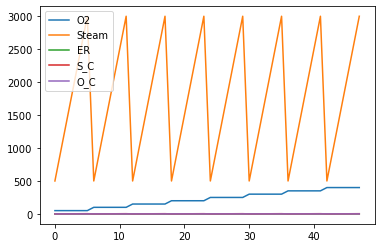

In [21]:
df2.plot()

Plot the chart using pyplot object

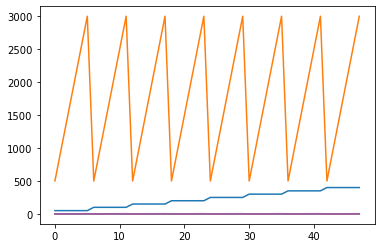

In [22]:
plt.plot(df2)

Visualize the simulation with change in Oxygen at a constant steam. 

In [23]:
df_O2 = df2.set_index('O2')

In [24]:
df_O2.head()

,Steam,ER,S_C,O_C
O2,,,,
50,500,0.038631,0.574960,0.046202
50,1000,0.038631,1.149921,0.046202
50,1500,0.038631,1.724881,0.046202
50,2000,0.038631,2.299842,0.046202
50,2500,0.038631,2.874802,0.046202


In [25]:
df_O2.tail()

,Steam,ER,S_C,O_C
O2,,,,
400,1000,0.309047,1.149921,0.369617
400,1500,0.309047,1.724881,0.369617
400,2000,0.309047,2.299842,0.369617
400,2500,0.309047,2.874802,0.369617
400,3000,0.309047,3.449763,0.369617


Select ER, S_C and O_C at Steam equal 1000

In [26]:
df_O2_Steam1000 = df_O2[df_O2['Steam'] == 1000]

In [27]:
df_O2_Steam1000

,Steam,ER,S_C,O_C
O2,,,,
50,1000,0.038631,1.149921,0.046202
100,1000,0.077262,1.149921,0.092404
150,1000,0.115893,1.149921,0.138607
200,1000,0.154524,1.149921,0.184809
250,1000,0.193155,1.149921,0.231011
300,1000,0.231786,1.149921,0.277213
350,1000,0.270416,1.149921,0.323415
400,1000,0.309047,1.149921,0.369617


In [28]:
df_p1000 = df_O2_Steam1000[['ER','S_C','O_C']]

In [29]:
df_p1000

,ER,S_C,O_C
O2,,,
50,0.038631,1.149921,0.046202
100,0.077262,1.149921,0.092404
150,0.115893,1.149921,0.138607
200,0.154524,1.149921,0.184809
250,0.193155,1.149921,0.231011
300,0.231786,1.149921,0.277213
350,0.270416,1.149921,0.323415
400,0.309047,1.149921,0.369617


<AxesSubplot:xlabel='O2'>

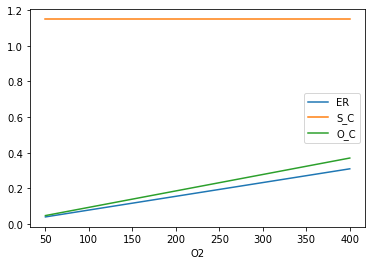

In [30]:
df_p1000.plot.line()

<AxesSubplot:xlabel='O2'>

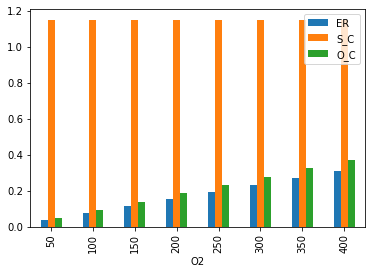

In [31]:
df_p1000.plot.bar()

Select ER, S_C and O_C at Steam equal 2500

In [32]:
df_O2_Steam2500 = df_O2[df_O2['Steam'] == 2500]

In [33]:
df_p2500 = df_O2_Steam2500[['ER','S_C','O_C']]

In [34]:
df_p2500

,ER,S_C,O_C
O2,,,
50,0.038631,2.874802,0.046202
100,0.077262,2.874802,0.092404
150,0.115893,2.874802,0.138607
200,0.154524,2.874802,0.184809
250,0.193155,2.874802,0.231011
300,0.231786,2.874802,0.277213
350,0.270416,2.874802,0.323415
400,0.309047,2.874802,0.369617


<AxesSubplot:xlabel='O2'>

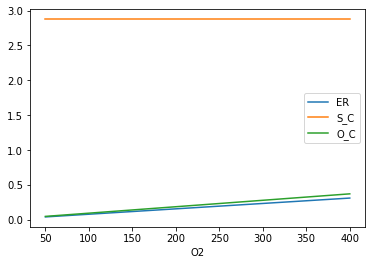

In [35]:
df_p2500.plot.line()

Visualize the two charts in thesame plot

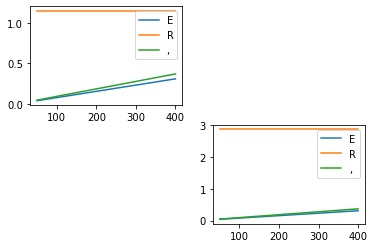

In [36]:
ax1 = plt.subplot(2,2,1)
plt.plot(df_p1000)
plt.legend('ER,S_C,O_C')
ax4 = plt.subplot(2,2,4)
plt.plot(df_p2500)
plt.legend('ER,S_C,O_C')

Alternative visualization Using subplots

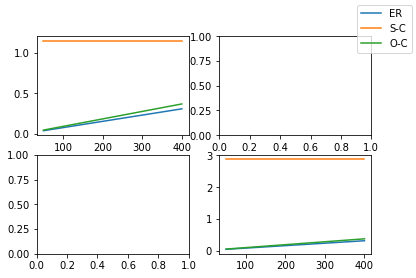

In [37]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(df_p1000)
ax[1,1].plot(df_p2500)
fig.legend(('ER','S-C','O-C'))

Visualize on a single plot

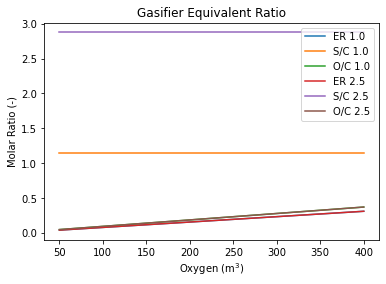

In [38]:
fig, ax = plt.subplots()
ax.plot(df_p1000)
ax.plot(df_p2500)
ax.set_xlabel('Oxygen (m$^3$)')
ax.set_ylabel('Molar Ratio (-)')
ax.set_title('Gasifier Equivalent Ratio')
ax.legend(('ER 1.0','S/C 1.0','O/C 1.0','ER 2.5','S/C 2.5','O/C 2.5'))

**Question**   
Visualize ER and ER2 only